<a href="https://colab.research.google.com/github/dionysus98/l_torch/blob/main/02_torch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. NN classification


## 1. Data

In [2]:
import sklearn

In [67]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [7]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
len(X), len(y)

In [8]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [78]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

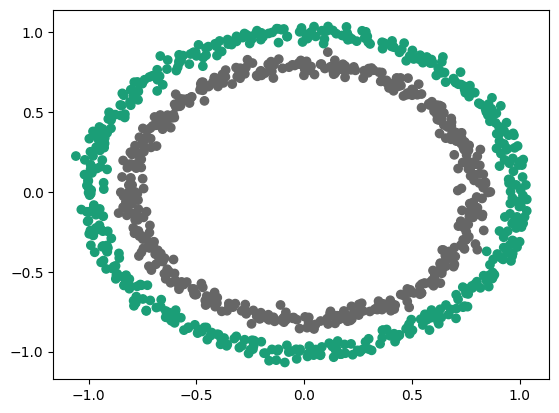

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.Dark2)

### 1.1 check input and output shapes

In [14]:
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
# features and lables
X_sample = X[0]
y_sample = y[0]

X_sample, X_sample.shape, y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

### 1.2 convert data to tensor

In [17]:
import torch
torch.__version__

'2.3.0+cu121'

In [68]:
if not type(X) == torch.Tensor:
  X = torch.from_numpy(X).type(torch.float)

if not type(y) == torch.Tensor:
  y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [70]:
# splitting datra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                        y,
                                        test_size=0.2,

                                        random_state=42)

In [29]:
len(X_train), len(y_train)

(800, 800)

## 2. Build a Model

In [71]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [72]:
# create a NN
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(
        in_features=2,
        out_features=5)

    self.layer_2 = nn.Linear(
        in_features=5,
        out_features=1)

    # self.layers = nn.Sequential(
    # nn.Linear(in_features=2,out_features=5),
    # nn.Linear(in_features=5,out_features=1),)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))
    # return self.layers(x)

In [36]:
model_0 = CircleModelV1().to(device)
model_0.state_dict(), next(model_0.parameters()).device

(OrderedDict([('layer_1.weight',
               tensor([[ 0.0990,  0.2178],
                       [ 0.2557, -0.0222],
                       [-0.6080, -0.3056],
                       [-0.3681,  0.0878],
                       [-0.5924, -0.1211]])),
              ('layer_1.bias',
               tensor([-0.3021, -0.3275,  0.5988,  0.5789, -0.3923])),
              ('layer_2.weight',
               tensor([[ 0.0286,  0.0259,  0.2252,  0.4270, -0.3690]])),
              ('layer_2.bias', tensor([0.3470]))]),
 device(type='cpu'))

In [73]:
# use NN sequential, same result as Subclassing nn.Module as before.
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1),
).to(device)

model_0.state_dict(),

(OrderedDict([('0.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]])),
              ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
              ('1.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
              ('1.bias', tensor([-0.2060]))]),)

In [46]:
# Make Predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds.shape, len(untrained_preds), untrained_preds[:10]

(torch.Size([200, 1]),
 200,
 tensor([[-0.2992],
         [-0.2822],
         [-0.3318],
         [-0.2900],
         [-0.3126],
         [-0.3023],
         [-0.2696],
         [-0.2742],
         [-0.3326],
         [-0.2808]]))

In [47]:
X_test[:10], y_test[:10],

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 loss function & optimizer

In [74]:
## Loss function: Binary Cross Entropy
lfn = nn.BCEWithLogitsLoss()
optm = torch.optim.SGD(params=model_0.parameters(),
                       lr=0.1)

In [75]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct/len(y_pred)) * 100

## 3. Train

### 3.1 Logits -> Pred Probabilities -> Pred Labels

- use `sigmoid` for `logit -> pred prob` for `BCE`

In [55]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits, y_test[:5]

(tensor([[-0.2992],
         [-0.2822],
         [-0.3318],
         [-0.2900],
         [-0.3126]]),
 tensor([1., 0., 1., 0., 1.]))

In [56]:
# use Activation: Sigmoid
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs,

(tensor([[0.4258],
         [0.4299],
         [0.4178],
         [0.4280],
         [0.4225]]),)

In [62]:
y_preds = torch.round(y_pred_probs).squeeze()
y_preds, y_test[:5]

(tensor([0., 0., 0., 0., 0.]), tensor([1., 0., 1., 0., 1.]))

### 3.2 training loop

In [77]:
epoch_count = []
loss_values = []
acc_values = []
test_loss_values = []
test_acc_values = []

epochs = 100
torch.manual_seed(42)

# Data on Target Device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  # forward
  y_logit = model_0(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logit)
  y_pred = torch.round(y_pred_probs)

  loss = lfn(y_logit, y_train) ## BCEwithlogitloss expects logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optm.zero_grad()
  loss.backward()
  optm.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    y_test_logit = model_0(X_test).squeeze()
    y_test_pred_probs = torch.sigmoid(y_test_logit)
    y_test_pred = torch.round(y_test_pred_probs)
    test_loss = lfn(y_test_logit, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=y_test_pred)

  # logging
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    acc_values.append(acc)
    test_loss_values.append(test_loss)
    test_acc_values.append(test_acc)
    print(f"k: {epoch} | l: {loss:.5f} | Acc: {acc:.2f}| tl: {test_loss:.5f} | TAcc : {test_acc:.2f}")


k: 0 | l: 0.69298 | Acc: 51.38| tl: 0.69472 | TAcc : 46.00
k: 10 | l: 0.69298 | Acc: 51.38| tl: 0.69472 | TAcc : 46.00
k: 20 | l: 0.69298 | Acc: 51.38| tl: 0.69471 | TAcc : 46.00
k: 30 | l: 0.69298 | Acc: 51.25| tl: 0.69471 | TAcc : 46.00
k: 40 | l: 0.69298 | Acc: 51.25| tl: 0.69471 | TAcc : 46.00
k: 50 | l: 0.69298 | Acc: 51.12| tl: 0.69471 | TAcc : 46.00
k: 60 | l: 0.69298 | Acc: 51.12| tl: 0.69470 | TAcc : 46.00
k: 70 | l: 0.69298 | Acc: 51.12| tl: 0.69470 | TAcc : 46.00
k: 80 | l: 0.69298 | Acc: 51.12| tl: 0.69470 | TAcc : 46.00
k: 90 | l: 0.69298 | Acc: 51.12| tl: 0.69470 | TAcc : 46.00


## 4. Make predictions and Evaluate

model sucks as of now,
do some predictions.

In [79]:
import requests
from pathlib import Path

helper_file = "helper_functions.py"

if not Path(helper_file).is_file():
  url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
  req = requests.get(url)
  with open(helper_file, "wb") as f:
    f.write(req.content)

from helper_functions import plot_predictions, plot_decision_boundary

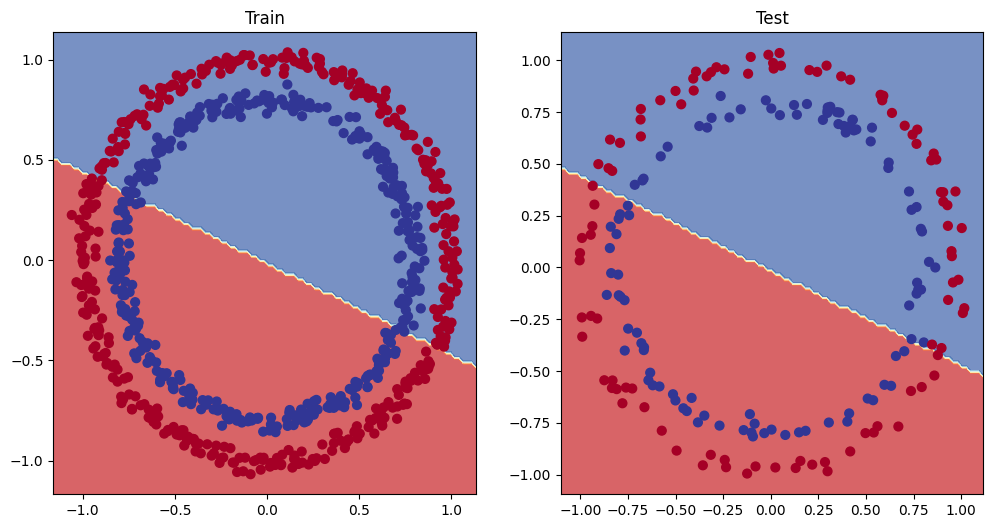

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)